# Linear A Deep Learning Classifier | Convolutional Neural Network Model
### Jonas Hansen
### December 1, 2021

In [1]:
import numpy as np
import os
from matplotlib import pyplot as plt
import matplotlib.image as mpimage
from PIL import Image
import cv2
import random
import pickle
import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import model_from_json
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

In [4]:
from google.colab import drive
drive._mount('/content/gdrive')

file_list = []
class_list = []

DATADIR = "/content/gdrive/MyDrive/Sophomore Year/Semester 1/HIST 1056/FinalResearchProject/LinearAClassifier/data"

# All the categories you want your neural network to detect
CATEGORIES = ["a", "da", "de", "di", "du", "e", "i", "ja", "je", "ju", "ka",
	          "ke", "ki", "ko", "ku", "ma", "me", "mi", "mu", "na", "ne", "ni",
	          "nu", "o", "pa", "pi", "po", "pu", "qa", "qe", "qi", "ra", "re", 
              "ri", "ro", "ru", "sa", "se", "si", "su", "ta", "te", "ti", "o",
              "tu", "u", "wi", "za", "ze", "zo"]

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.activity.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fexperimentsandconfigs%20https%3a%2f%2fwww.googleapis.com%2fauth%2fphotos.native&response_type=code

Enter your authorization code:
4/1AX4XfWhBB5pUQGE5bPqc12nGtbh2VlYd48l4-z5NQrIXS7S7LYvxVvPsHGY
Mounted at /content/gdrive


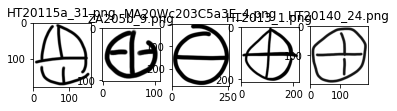

In [ ]:
phonetic = "ka"
test_folder = os.path.join(DATADIR, phonetic)
for i in range(5):
    file = random.choice(os.listdir(test_folder))
    image_path= os.path.join(test_folder, file)
    img = mpimage.imread(image_path)
    ax=plt.subplot(1,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

/content/gdrive/MyDrive/Sophomore Year/Semester 1/HIST 1056/FinalResearchProject/LinearAClassifier/data/a/KH205_1.png


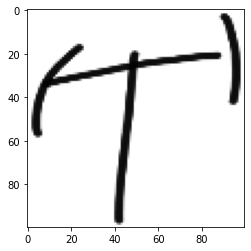

100


In [ ]:
test_data = []
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    class_num = CATEGORIES.index(category)
    for img in os.listdir(path):  # iterate over each image per dogs and cat
        print(os.path.abspath(os.path.join(path,img)))
        img_array = mpimage.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)  # convert to array
        new_array = cv2.resize(img_array, (100, 100))
        test_data.append([new_array, class_num])
        plt.imshow(new_array, cmap="gray")  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

print(len(test_data[0][0]))

In [ ]:
# The size of the images that your neural network will use
IMG_SIZE = 100  

training_data = []

def create_training_data():
	for category in CATEGORIES :
		path = os.path.join(DATADIR, category)
		class_num = CATEGORIES.index(category)
		for img in os.listdir(path):
			try:
				img_array = mpimage.imread(os.path.join(path, img))
				new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 1)
				training_data.append([new_array, class_num])
			except Exception as e:
				pass
create_training_data()

random.shuffle(training_data)

X = [] #features
y = [] #labels

for features, label in training_data:
	X.append(features)
	y.append(label)

print(np.array(X).shape[0])

X = np.array(X)

print(len(X))

# Creating the files containing all the information about your model
pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

2897
2897


In [ ]:
# X = X.reshape(len(y), IMG_SIZE, IMG_SIZE, 4)
print(X.shape)

(2897, 100, 100, 4)


In [ ]:
# Opening the files about data
X_data = np.array(pickle.load(open("X.pickle", "rb")))
y_data = np.array(pickle.load(open("y.pickle", "rb")))
X_train, X_test, y_train, y_test = train_test_split(X, y) #splitting dataset into 2 halves

In [ ]:
print(X_train.shape)
print(X_test.shape)

(2172, 100, 100, 4)
(725, 100, 100, 4)


In [ ]:
#Defining the Convolutional Neural Network
batch_size = 64
num_classes = 50
epochs = 50

# normalizing data (a pixel goes from 0 to 255)
# X_train = X_train/255.0

# Building the model
cnn_model = Sequential()
# 3 convolutional layers
cnn_model.add(Conv2D(32, (3, 3), input_shape = X_data.shape[1:], activation='relu'))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

# # 2 hidden layers
# model.add(Flatten())
# model.add(Dense(128, kernel_regularizer='l2'))
# model.add(Activation("relu"))

# model.add(Dense(128, kernel_regularizer='l2'))
# model.add(Activation("relu"))

# # The output layer with 50 neurons, for 50 classes
# model.add(Dense(num_classes))
# model.add(Activation("softmax"))

# model.add(Dense(128, activation='tanh', input_shape = X_train[0].shape, kernel_regularizer='l2'))

cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3, 3), input_shape = (IMG_SIZE,IMG_SIZE,4), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3, 3), input_shape = (IMG_SIZE,IMG_SIZE,4), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size = (2, 2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 512, activation = 'relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(units = num_classes, activation = 'softmax'))


# Compiling the model using some basic parameters
cnn_model.compile(loss="sparse_categorical_crossentropy",
				optimizer="adam",
				metrics=["accuracy"])
cnn_model.summary()

# create image data augmentation generator
train_datagen = ImageDataGenerator(rotation_range=90)
train_datagen.fit(X_train)

test_datagen = ImageDataGenerator()
# prepare iterator
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)

# This is a similar generator, for validation data
validation_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 98, 98, 32)        1184      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 49, 49, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 23, 23, 64)       

(64, 100, 100, 4)
(64, 100, 100, 4)
(64, 100, 100, 4)
(64, 100, 100, 4)
(64, 100, 100, 4)
(64, 100, 100, 4)
(64, 100, 100, 4)
(64, 100, 100, 4)
(64, 100, 100, 4)


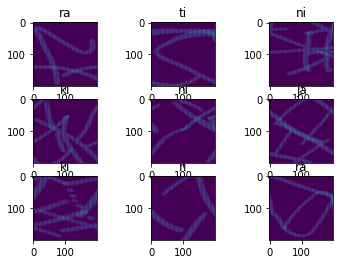

In [ ]:
for x_batch, y_batch in train_generator:
    # Show the first 9 images
    for i in range(0, 9):
        print(x_batch.shape)
        plt.subplot(330 + 1 + i)
        plt.imshow(x_batch[i+10].reshape(200, 200))
        plt.title(CATEGORIES[y_batch[i+10]])
    # show the plot
    plt.show()
    break

In [ ]:
# Training the model, with 40 iterations
# validation_split corresponds to the percentage of images used for the validation phase compared to all the images
# history = cnn_model.fit(X_data, y_data, batch_size=32, epochs=40, verbose=1, 
                        # validation_split=0.1)

# history = model.fit_generator(train_generator)

history = cnn_model.fit(
            train_generator,
            steps_per_epoch=len(X_train) // batch_size,
            epochs=epochs*2,
            validation_data=validation_generator,
            validation_steps=len(X_test) // batch_size)

# # Saving the model
# model_json = model.to_json()
# with open("model.json", "w") as json_file :
# 	json_file.write(model_json)

# model.save_weights("model.h5")
# print("Saved model to disk")

cnn_model.save('CNN.model')

Epoch 1/100
33/33 [==============================] - 53s 2s/step - loss: 3.5771 - accuracy: 0.1110 - val_loss: 3.3962 - val_accuracy: 0.2273
Epoch 2/100
33/33 [==============================] - 52s 2s/step - loss: 3.0555 - accuracy: 0.2059 - val_loss: 2.6667 - val_accuracy: 0.3366
Epoch 3/100
33/33 [==============================] - 52s 2s/step - loss: 2.5309 - accuracy: 0.3250 - val_loss: 2.3255 - val_accuracy: 0.4034
Epoch 4/100
33/33 [==============================] - 52s 2s/step - loss: 2.2512 - accuracy: 0.3843 - val_loss: 1.9785 - val_accuracy: 0.4574
Epoch 5/100
33/33 [==============================] - 52s 2s/step - loss: 2.0228 - accuracy: 0.4454 - val_loss: 1.8102 - val_accuracy: 0.5270
Epoch 6/100
33/33 [==============================] - 52s 2s/step - loss: 1.8719 - accuracy: 0.4862 - val_loss: 1.7256 - val_accuracy: 0.5284
Epoch 7/100
33/33 [==============================] - 51s 2s/step - loss: 1.6955 - accuracy: 0.5380 - val_loss: 1.5220 - val_accuracy: 0.5810
Epoch 8/100
3

In [ ]:
#Predictions for the test data
predicted_classes = np.argmax(cnn_model.predict(X_test), axis=-1)

#Classification accuracy
acc_score = accuracy_score(y_test, predicted_classes)
print('Accuracy Score = ',acc_score*100, "%")

Accuracy Score =  75.72413793103449 %


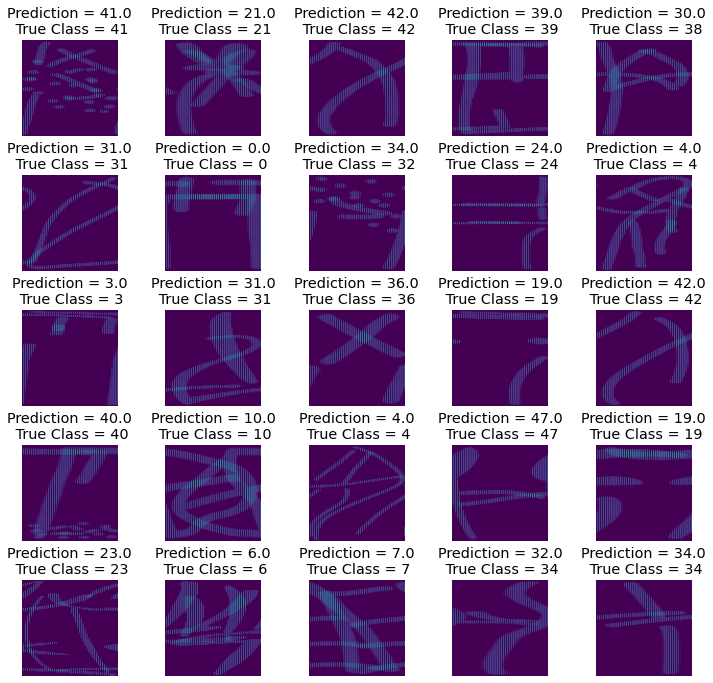

In [ ]:
#Visualize predictions
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i].reshape(200,200))
    axes[i].set_title("Prediction = " + str(float(predicted_classes[i])) + \
                      "\n True Class = " + str(y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=0.5)

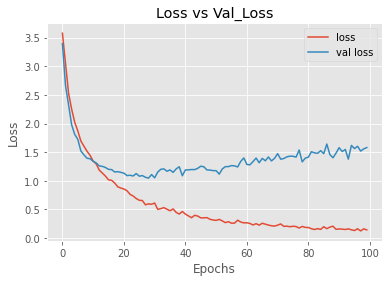

In [ ]:
plt.style.use('ggplot')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


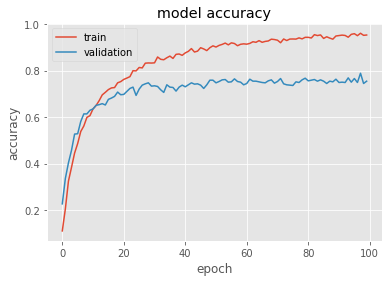

In [ ]:
# Printing a graph showing the accuracy changes during the training phase
print(history.history.keys())
plt.figure(1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

Enter path to image: /content/gdrive/MyDrive/Sophomore Year/Semester 1/HIST 1056/FinalResearchProject/LinearAClassifier/test_images/qe_test.png


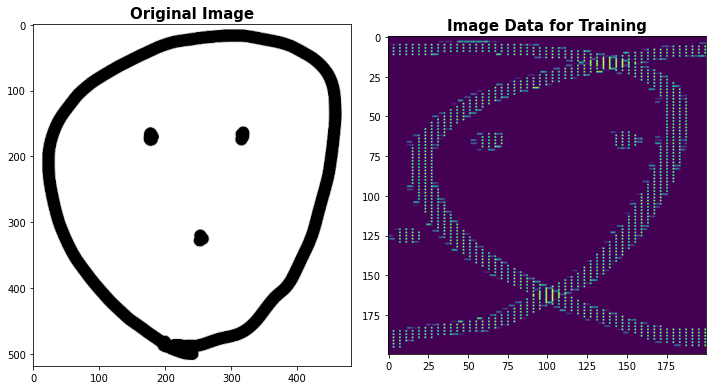

---------------------------

Predicted Linear A Symbol: qe

---------------------------
Class Prediction Percentages:
qe : 99.9983549118042 %
ka : 0.0016411884644185193 %
su : 1.4343967125185486e-07 %
ta : 4.504439321539877e-08 %
o : 3.881521770665586e-08 %
ja : 2.0847372439458667e-09 %
ma : 1.1770513383413395e-09 %
ra : 1.954390018961763e-11 %
ri : 1.9397469199454453e-11 %
ko : 6.966332350387405e-12 %
ku : 3.269689266178501e-13 %
mi : 9.904318135761907e-14 %
ze : 3.2707340151444904e-15 %
tu : 9.190928690349186e-16 %
ti : 3.374812113203566e-17 %
wi : 8.310045053505598e-20 %
ju : 6.271145060451784e-21 %
ne : 3.566436365971849e-21 %
qa : 1.087286749007849e-21 %
qi : 4.0141814306590836e-22 %
nu : 8.248316066444091e-24 %
po : 3.9085247536726285e-24 %
u : 2.1042482542269523e-24 %
ru : 1.3115512047055123e-24 %
ni : 3.8574651152846163e-25 %
zo : 8.559495192757745e-26 %
di : 5.649198861152374e-26 %
pu : 5.23353117904511e-26 %
a : 2.993624579544201e-26 %
si : 7.364541245777369e-27 %
pi : 1.9499

In [ ]:
def prepare(file):
    IMG_SIZE = 100
    img_array = mpimage.imread(os.path.abspath(file), cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE), 1)
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 4)

model = tf.keras.models.load_model("/content/gdrive/MyDrive/Sophomore Year/Semester 1/HIST 1056/FinalResearchProject/LinearAClassifier/CNN.model")
input_image = input("Enter path to image: ")
image = prepare(input_image)
prediction = model.predict([image/255.0])
prediction_list = list(prediction[0])

mp_img = mpimage.imread(os.path.abspath(input_image))
fig, [ax1, ax2] = plt.subplots(nrows=1, ncols=2, figsize=(10,10))
ax1.imshow(mp_img)
ax1.set_title("Original Image", fontsize=15, fontweight="bold")
ax2.imshow(image.reshape(200, 200))
ax2.set_title("Image Data for Training", fontsize=15, fontweight="bold")
fig.tight_layout()
plt.show()
print("---------------------------\n")
print("Predicted Linear A Symbol:", CATEGORIES[prediction_list.index(max(prediction_list))])
print("\n---------------------------")
print("Class Prediction Percentages:")
pred_sorted = sorted(prediction_list, reverse=True)
for prob in pred_sorted:
    print(CATEGORIES[prediction_list.index(prob)], ":", prob*100, "%")